In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
# Inisialisasi dataset
df = pd.read_excel('Obesity_Dataset.xlsx')

In [20]:
# Melihat dimensi data
print("Dimensi data:", df.shape)

# Melihat informasi kolom
df.info()

Dimensi data: (1610, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Sex                                1610 non-null   int64
 1   Age                                1610 non-null   int64
 2   Height                             1610 non-null   int64
 3   Overweight_Obese_Family            1610 non-null   int64
 4   Consumption_of_Fast_Food           1610 non-null   int64
 5   Frequency_of_Consuming_Vegetables  1610 non-null   int64
 6   Number_of_Main_Meals_Daily         1610 non-null   int64
 7   Food_Intake_Between_Meals          1610 non-null   int64
 8   Smoking                            1610 non-null   int64
 9   Liquid_Intake_Daily                1610 non-null   int64
 10  Calculation_of_Calorie_Intake      1610 non-null   int64
 11  Physical_Excercise                 1610 non-null   int64


In [21]:
# Melihat beberapa data awal
df.head()

,Sex,Age,Height,Overweight_Obese_Family,Consumption_of_Fast_Food,Frequency_of_Consuming_Vegetables,Number_of_Main_Meals_Daily,Food_Intake_Between_Meals,Smoking,Liquid_Intake_Daily,Calculation_of_Calorie_Intake,Physical_Excercise,Schedule_Dedicated_to_Technology,Type_of_Transportation_Used,Class
0,2,18,155,2,2,3,1,3,2,1,2,3,3,4,2
1,2,18,158,2,2,3,1,1,2,1,2,1,3,3,2
2,2,18,159,2,2,2,1,3,2,3,2,2,3,4,2
3,2,18,162,2,2,2,2,2,2,2,2,1,3,4,2
4,2,18,165,2,1,2,1,3,2,1,2,3,3,2,2


In [22]:
# Deskripsi statistik
df.describe()

# Mengecek nilai unik setiap kolom (untuk menemukan tipe kategorikal)
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

Sex: 2 unique values
Age: 37 unique values
Height: 42 unique values
Overweight_Obese_Family: 2 unique values
Consumption_of_Fast_Food: 2 unique values
Frequency_of_Consuming_Vegetables: 3 unique values
Number_of_Main_Meals_Daily: 3 unique values
Food_Intake_Between_Meals: 4 unique values
Smoking: 2 unique values
Liquid_Intake_Daily: 3 unique values
Calculation_of_Calorie_Intake: 2 unique values
Physical_Excercise: 5 unique values
Schedule_Dedicated_to_Technology: 3 unique values
Type_of_Transportation_Used: 5 unique values
Class: 4 unique values


In [23]:
df.isnull().sum()

Sex                                  0
Age                                  0
Height                               0
Overweight_Obese_Family              0
Consumption_of_Fast_Food             0
Frequency_of_Consuming_Vegetables    0
Number_of_Main_Meals_Daily           0
Food_Intake_Between_Meals            0
Smoking                              0
Liquid_Intake_Daily                  0
Calculation_of_Calorie_Intake        0
Physical_Excercise                   0
Schedule_Dedicated_to_Technology     0
Type_of_Transportation_Used          0
Class                                0
dtype: int64

In [25]:
df['Class'].unique()

array([2, 3, 4, 1], dtype=int64)

In [28]:
df_2 = df.copy()

In [30]:
df_2['Class'] = df_2['Class'].replace({1: 'Underweight', 2: 'Normal', 3: 'Overweight', 4: 'Obesity'}) 

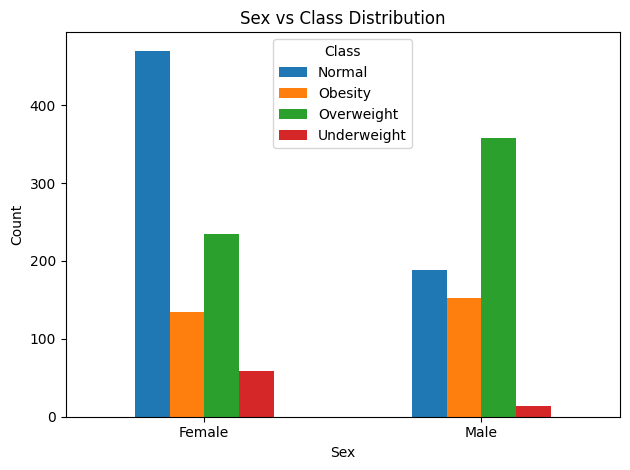

In [35]:
df_2['Sex'] = df_2['Sex'].replace({1: 'Male', 2: 'Female'}) 
sex_class_counts = pd.crosstab(df_2['Sex'], df_2['Class'])

sex_class_counts.plot(kind='bar', stacked=False)

plt.title('Sex vs Class Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=0)  
plt.legend(title='Class')

plt.tight_layout()
plt.show()

In [37]:
age_bins = [0, 20, 30, 40, 50, 60, 70, 80, 100]
age_labels = ['<20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80+']

df_2['Age Group'] = pd.cut(df_2['Age'], bins=age_bins, labels=age_labels)

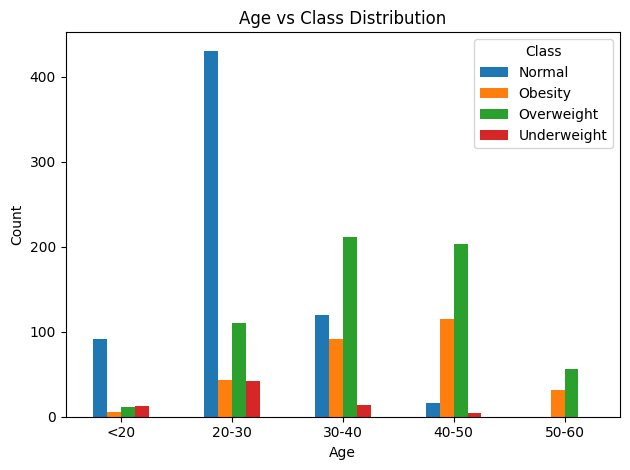

In [38]:
# df_2['Sex'] = df_2['Sex'].replace({1: 'Male', 2: 'Female'}) 
age_class_counts = pd.crosstab(df_2['Age Group'], df_2['Class'])


age_class_counts.plot(kind='bar', stacked=False)

plt.title('Age vs Class Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=0)  
plt.legend(title='Class')

plt.tight_layout()
plt.show()

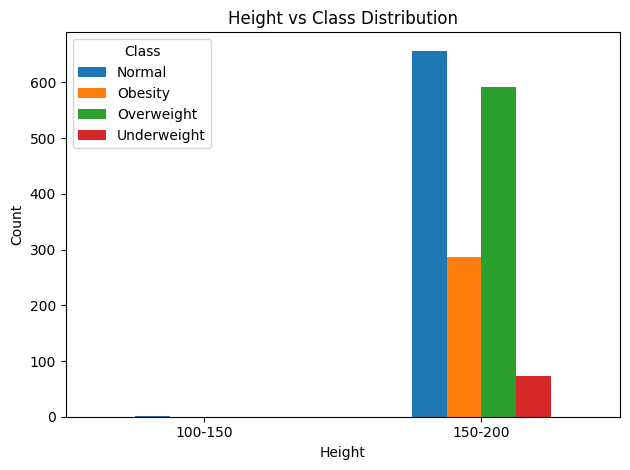

In [43]:
# Height vs class distribution 
ht_bins = [0, 50, 100, 150, 200, 250, 300]
ht_labels = ['<50', '50-100', '100-150', '150-200', '200-250', '250+']

df_2['Height Group'] = pd.cut(df_2['Height'], bins=ht_bins, labels=ht_labels)

ht_class_counts = pd.crosstab(df_2['Height Group'], df_2['Class'])


ht_class_counts.plot(kind='bar', stacked=False)

plt.title('Height vs Class Distribution')
plt.xlabel('Height')
plt.ylabel('Count')
plt.xticks(rotation=0)  
plt.legend(title='Class')

plt.tight_layout()
plt.show()

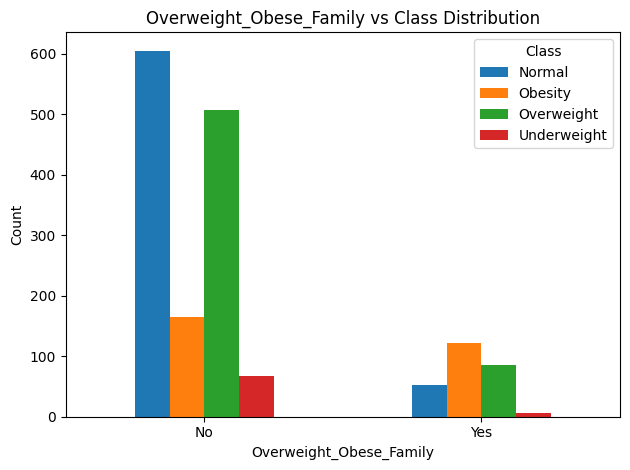

In [44]:
# df_2['Overweight_Obese_Family']
df_2['Overweight_Obese_Family'] = df_2['Overweight_Obese_Family'].replace({1: 'Yes', 2: 'No'})
fam_class_counts = pd.crosstab(df_2['Overweight_Obese_Family'], df_2['Class'])


fam_class_counts.plot(kind='bar', stacked=False)

plt.title('Overweight_Obese_Family vs Class Distribution')
plt.xlabel('Overweight_Obese_Family')
plt.ylabel('Count')
plt.xticks(rotation=0)  
plt.legend(title='Class')

plt.tight_layout()
plt.show()

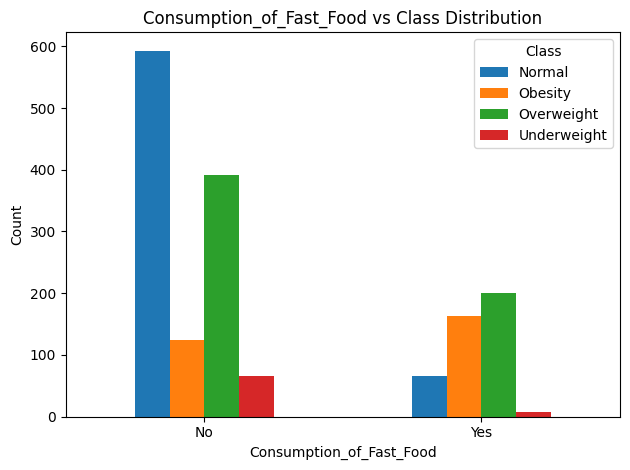

In [45]:
# df_2['Consumption_of_Fast_Food']
df_2['Consumption_of_Fast_Food'] = df_2['Consumption_of_Fast_Food'].replace({1: 'Yes', 2: 'No'})
fam_class_counts = pd.crosstab(df_2['Consumption_of_Fast_Food'], df_2['Class'])


fam_class_counts.plot(kind='bar', stacked=False)

plt.title('Consumption_of_Fast_Food vs Class Distribution')
plt.xlabel('Consumption_of_Fast_Food')
plt.ylabel('Count')
plt.xticks(rotation=0)  
plt.legend(title='Class')

plt.tight_layout()
plt.show()